### **Data Visualization**
* The data set is presented in the form of a RDBMS.

<hr>


In [4]:
#Download database file
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-03-17 17:28:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.1'

m4_survey_data.sqli 100%[===================>]  34.98M   211KB/s    in 5m 8s   

2024-03-17 17:33:53 (116 KB/s) - 'm4_survey_data.sqlite.1' saved [36679680/36679680]



In [12]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Visualizing distribution of data


#### Histogram of ConvertedComp

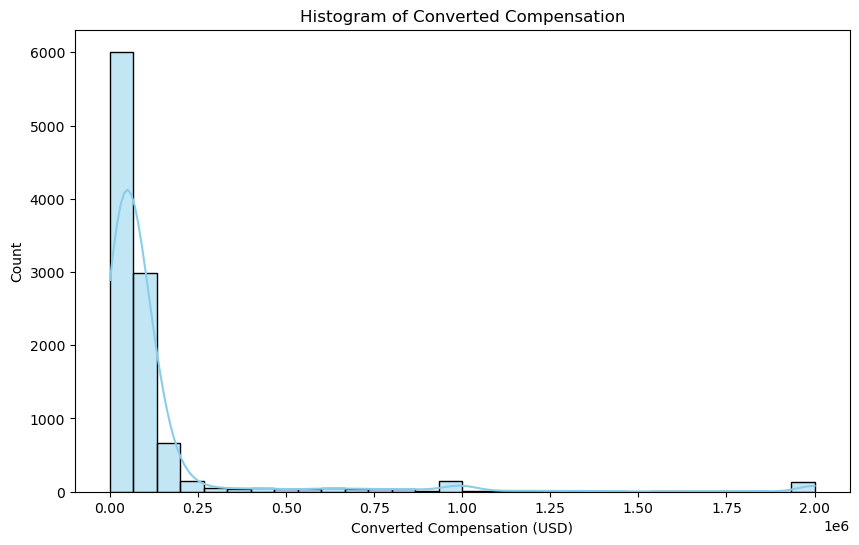

In [28]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
# Plot a histogram of ConvertedComp 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ConvertedComp', bins=30, kde=True, color='skyblue')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Count')
plt.show()

#### Box Plot of Age


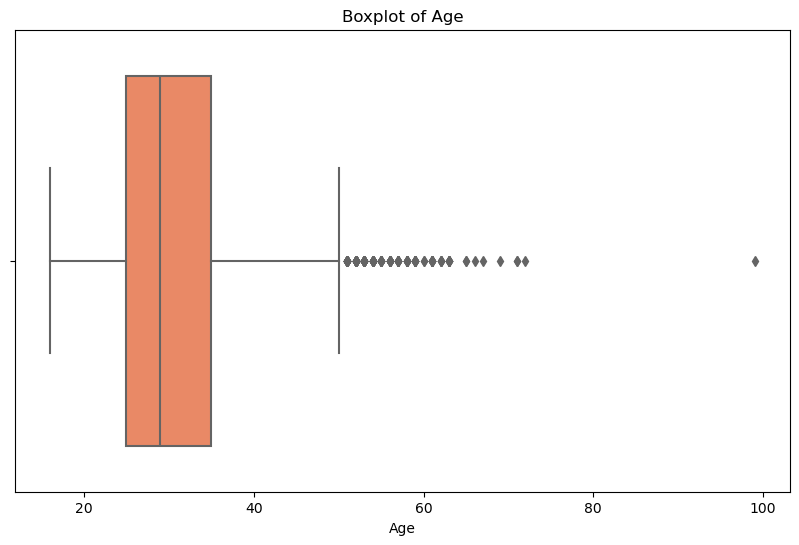

In [27]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
# Boxplot of Age 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', color='coral')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


### Visualizing relationships in data


#### Scatter Plot of Age and WorkWeekHrs


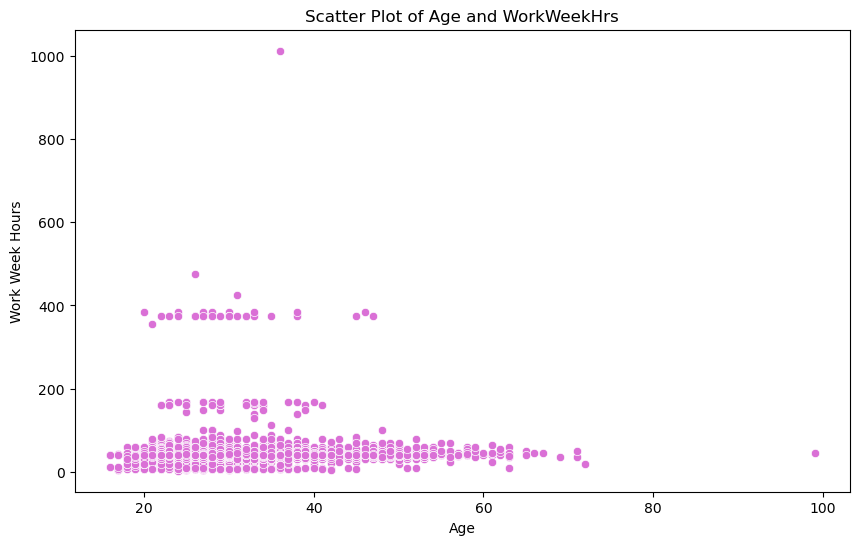

In [26]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
# Plot a scatter plot of Age and WorkWeekHrs 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='WorkWeekHrs', color='orchid')
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.show()


#### Bubble Plot of WorkWeekHrs and CodeRevHrs (Bubble Size: Age)


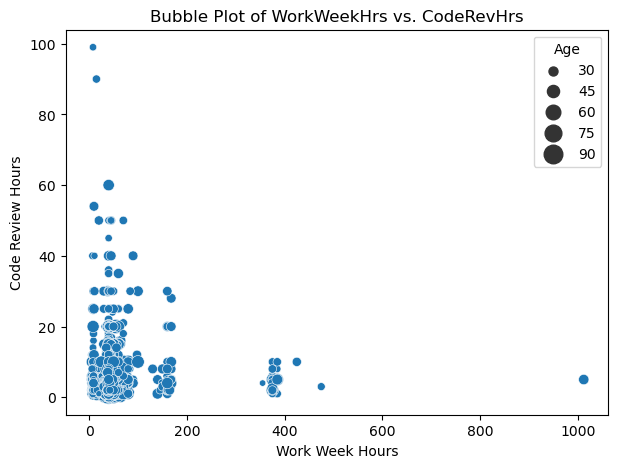

In [40]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
# Plot a bubble plot of WorkWeekHrs vs. CodeRevHrs with Age as bubble size 
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', sizes=(10, 200), legend=True)
plt.title('Bubble Plot of WorkWeekHrs vs. CodeRevHrs')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.show()

### Visualizing composition of data


#### Pie Chart of the top 5 databases that respondents wish to learn next year


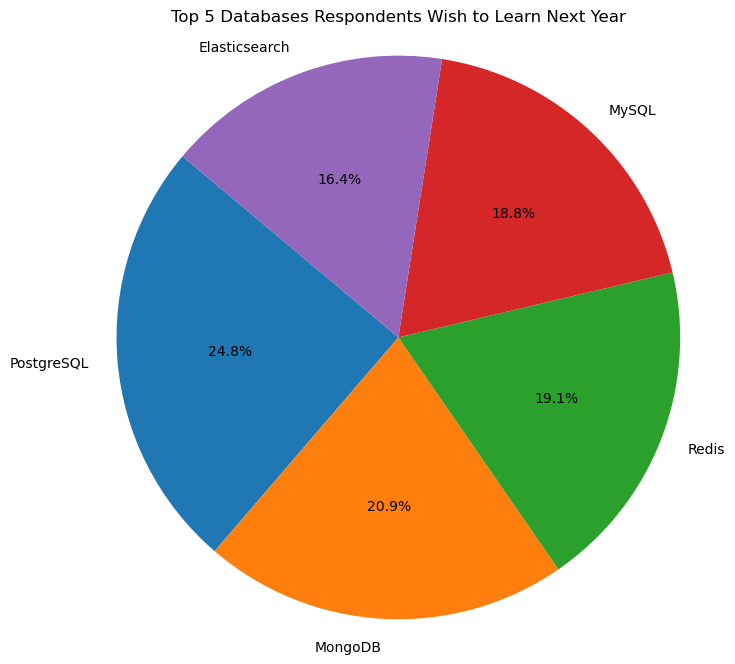

In [42]:
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the top 5 databases that respondents wish to learn next year
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  
plt.show()


#### Stacked Chart of WorkWeekHrs and CodeRevHrs for the age group 30 to 35.


<Figure size 1000x600 with 0 Axes>

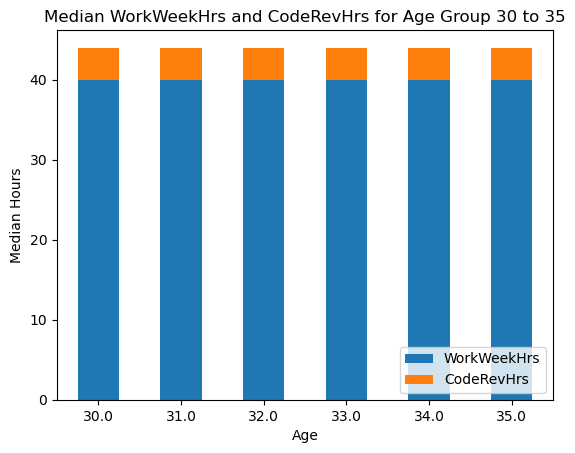

In [58]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age >= 30 AND Age <= 35
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()

median_values = df.groupby('Age').median().loc[30:35]

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
median_values.plot(kind='bar', stacked=True)
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.xticks(rotation=0)
plt.legend(['WorkWeekHrs', 'CodeRevHrs'], loc='lower right')
plt.show()


### Visualizing comparison of data


#### Line Chart for ConvertedComp


<Figure size 1000x600 with 0 Axes>

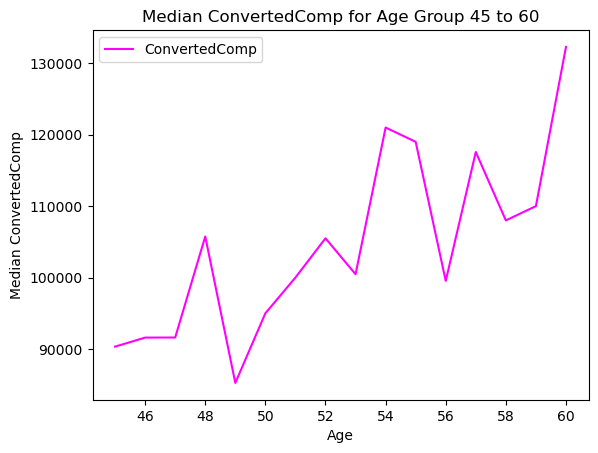

In [59]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 45 AND Age <= 60
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()

median_values = df.groupby('Age').median().loc[45:60]

# Plot a line chart 
plt.figure(figsize=(10, 6))
median_values.plot(kind='line',color='magenta')
plt.title('Median ConvertedComp for Age Group 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.show()

#### Bar Chart for MainBranch


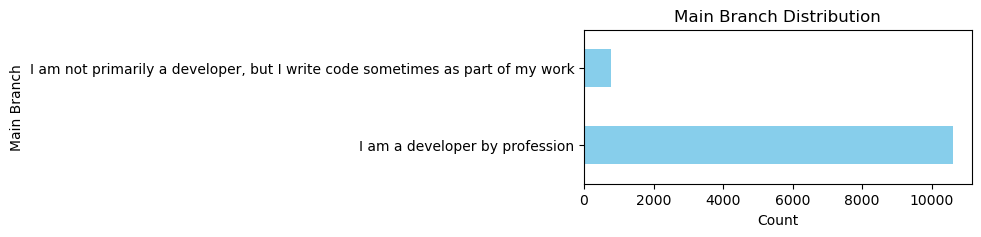

In [57]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT MainBranch
FROM master
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()

branch_counts = df['MainBranch'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(5, 2))
branch_counts.plot(kind='barh', color='skyblue')
plt.title('Main Branch Distribution')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.show()